In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
# %matplotlib inline
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D


In [2]:
iris = datasets.load_iris()
X= iris.data
y = iris.target

<IPython.core.display.Javascript object>


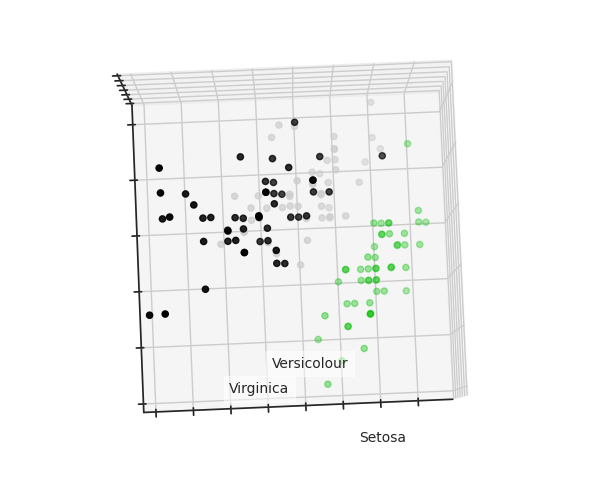

/tmp/ipykernel_3025642/3642248526.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
/tmp/ipykernel_3025642/3642248526.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_clr = np.choose(y, [1, 2, 0]).astype(np.float)


In [3]:
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Change the order of labels, so that they match
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, 
           cmap=plt.cm.nipy_spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([]);

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

preds = clf.predict_proba(X_test)
print(accuracy_score(y_test, preds.argmax(axis=1)))

0.8888888888888888


In [5]:
pca = decomposition.PCA(n_components=2)

X_centred = X - X.mean(axis=0)
pca.fit(X_centred)


PCA(n_components=2)

In [6]:
X_pca = pca.transform(X_centred)

In [9]:
X.shape

(150, 4)

In [8]:
X_pca.shape

(150, 2)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, stratify=y, random_state=42)
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

preds = clf.predict_proba(X_test)
print(accuracy_score(y_test, preds.argmax(axis=1)))

0.9111111111111111


In [11]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [12]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

<IPython.core.display.Javascript object>


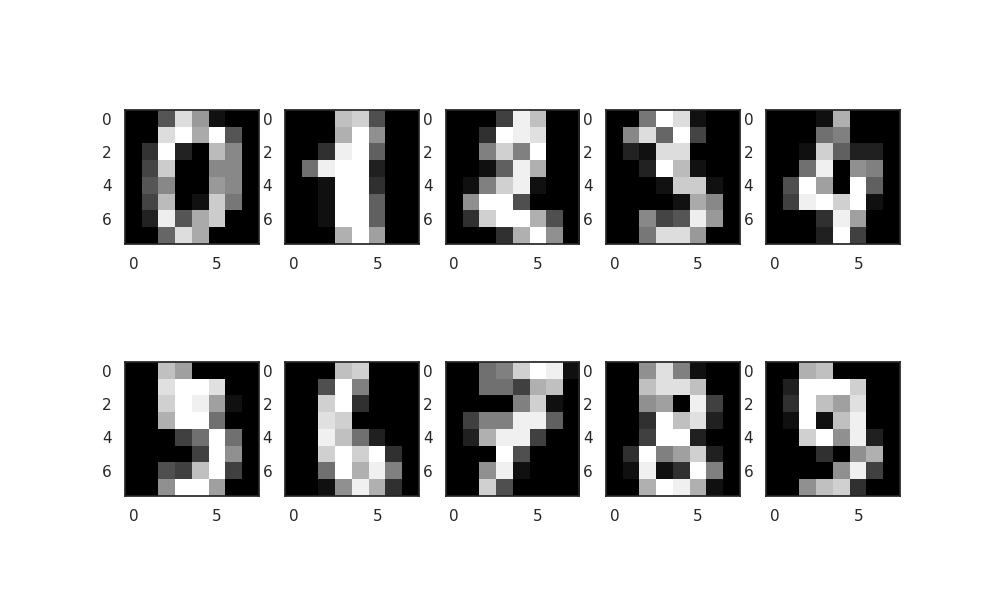

In [20]:
plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(X[i,:].reshape([8,8]), cmap = 'gray')

<IPython.core.display.Javascript object>


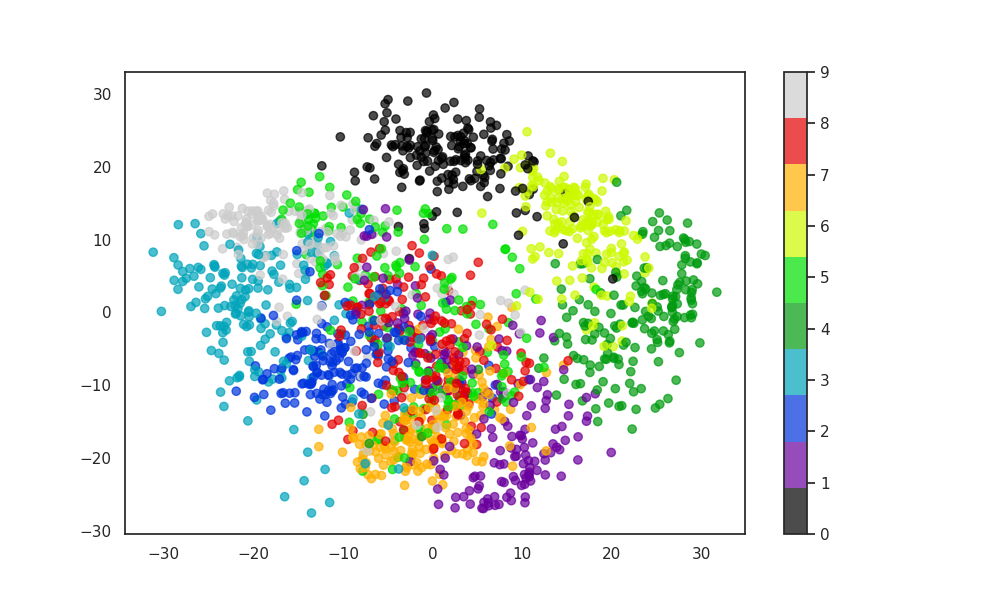

CPU times: user 1.37 s, sys: 5.14 s, total: 6.5 s
Wall time: 901 ms


In [25]:
%%time
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(X_reduced[:, 0], X_reduced[:,1], c = y, alpha=0.7, cmap = plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()



/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<IPython.core.display.Javascript object>


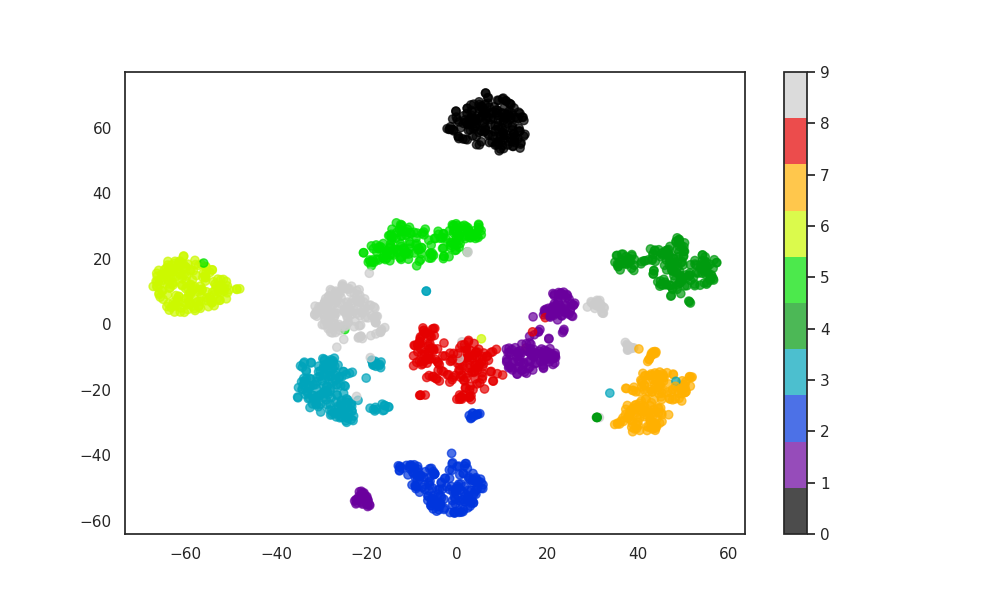

CPU times: user 8min 25s, sys: 1min 16s, total: 9min 42s
Wall time: 1min


In [26]:
%%time

from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(10,6))
plt.scatter(X_tsne[:, 0], X_tsne[:,1], c = y, alpha=0.7, cmap = plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
mall_data = pd.read_csv("Mall_Customers.csv")

In [3]:
mall_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
from sklearn.cluster import KMeans

In [7]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

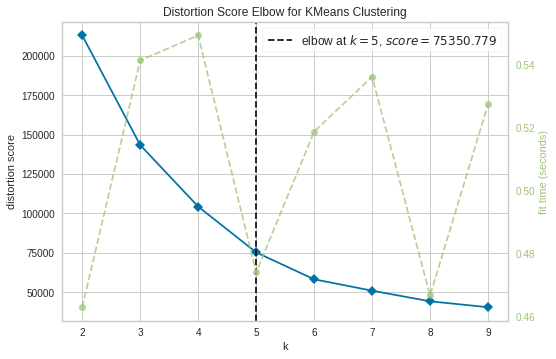

In [8]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)

visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_numerics)

visualizer.show()
plt.show()

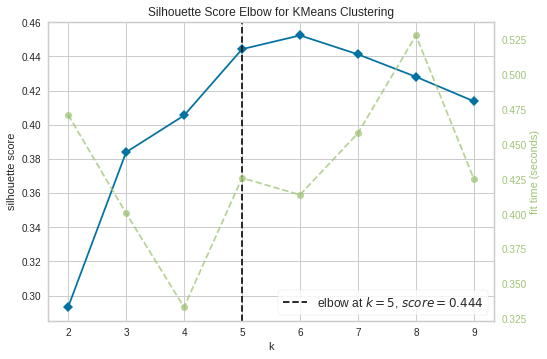

In [9]:
model = KMeans(random_state=1)

visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(X_numerics)

visualizer.show()
plt.show()

In [10]:
KM_5_clusters = KMeans(n_clusters=5).fit(X_numerics)

In [12]:
KM_5_clusters.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [14]:
KM_clustered = X_numerics.copy()
KM_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_

In [15]:
KM_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,3
1,21,15,81,4
2,20,16,6,3
3,23,16,77,4
4,31,17,40,3
...,...,...,...,...
195,35,120,79,0
196,45,126,28,1
197,32,126,74,0
198,32,137,18,1


In [ ]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


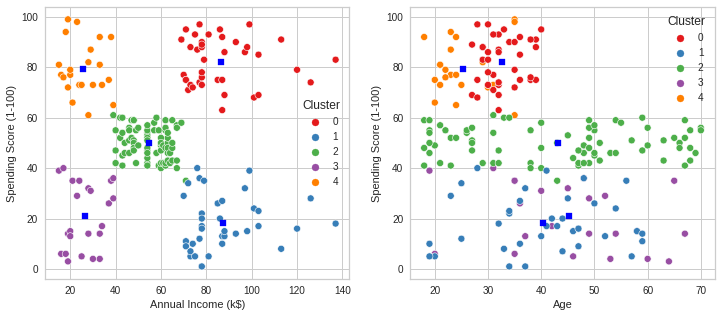

In [22]:
fig1, (axes) = plt.subplots(1,2, figsize = (12,5))

scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data = KM_clustered, hue = 'Cluster', ax = axes[0], palette='Set1', legend = 'full')
sns.scatterplot('Age', 'Spending Score (1-100)', data = KM_clustered, hue = 'Cluster', ax = axes[1], palette='Set1', legend = 'full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1], KM_5_clusters.cluster_centers_[:,2], marker = 's', s=40, c='blue')
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0], KM_5_clusters.cluster_centers_[:,2], marker = 's', s=40, c='blue')


plt.show()


In [23]:
KM_clust_sizes = KM_clustered.groupby("Cluster").size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,39
1,37
2,79
3,23
4,22


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0,0, 0.99, 1], elev = 20, azim = 210)

ax.scatter(KM_clustered['Age'], KM_clustered['Annual Income (k$)'],
           KM_clustered['Spending Score (1-100)'], c=KM_clustered['Cluster'], s=35, edgecolor='k', cmap = plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D View')
